# Семинар 9. Сезонная ARIMA. ARIMAX. Тест Гранжера.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

from sktime.utils.plotting import plot_correlations
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

from sktime.forecasting.arima import AutoARIMA, ARIMA
from sktime.forecasting.model_selection import ExpandingWindowSplitter, ForecastingGridSearchCV, temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon

import statsmodels.api as sm


plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (20,5)

### SARIMA

In [2]:
test_size = 20

data = sm.datasets.macrodata.load_pandas().data

train, test = temporal_train_test_split(data['pop'], test_size = test_size)

Text(0, 0.5, 'Million people')

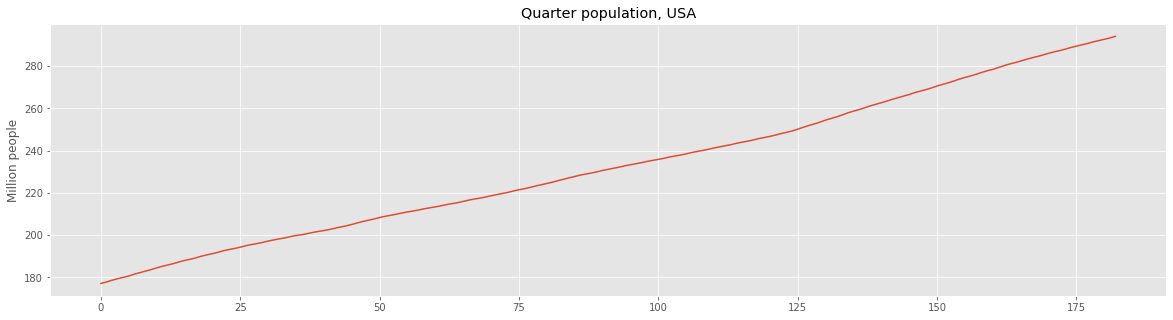

In [3]:
train.plot()
plt.title("Quarter population, USA")
plt.ylabel("Million people")

In [4]:
from statsmodels.tsa.stattools import kpss

kpss(train)

/home/the_sun/.local/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1850: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/home/the_sun/.local/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1881: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


(1.3205782393289038,
 0.01,
 14,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

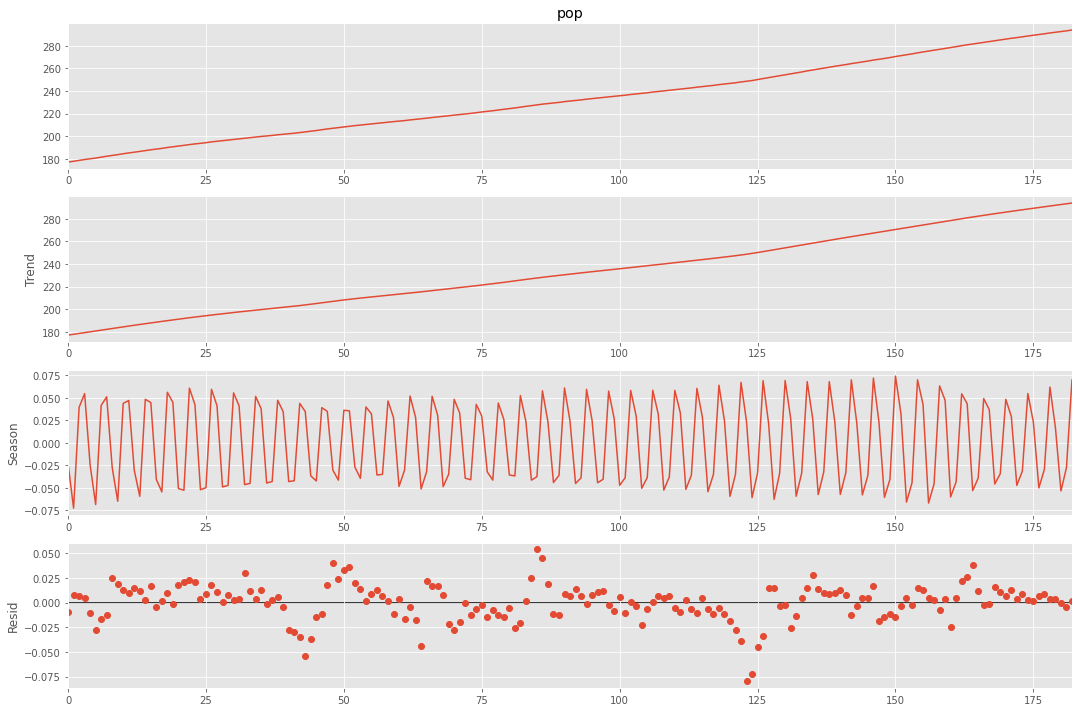

In [5]:
from statsmodels.tsa.seasonal import STL

plt.rcParams["figure.figsize"] = (15,10)

stl = STL(train, period=4)
res = stl.fit()
res.plot();

plt.rcParams["figure.figsize"] = (23,9)

In [6]:
seas_strength = max(0, 1 - res.resid.std()**2 / (res.resid.std()**2 + res.seasonal.std()**2))

seas_strength

0.8612429382262371

In [7]:
train_seas_diff = train.diff(4).dropna()

<AxesSubplot:>

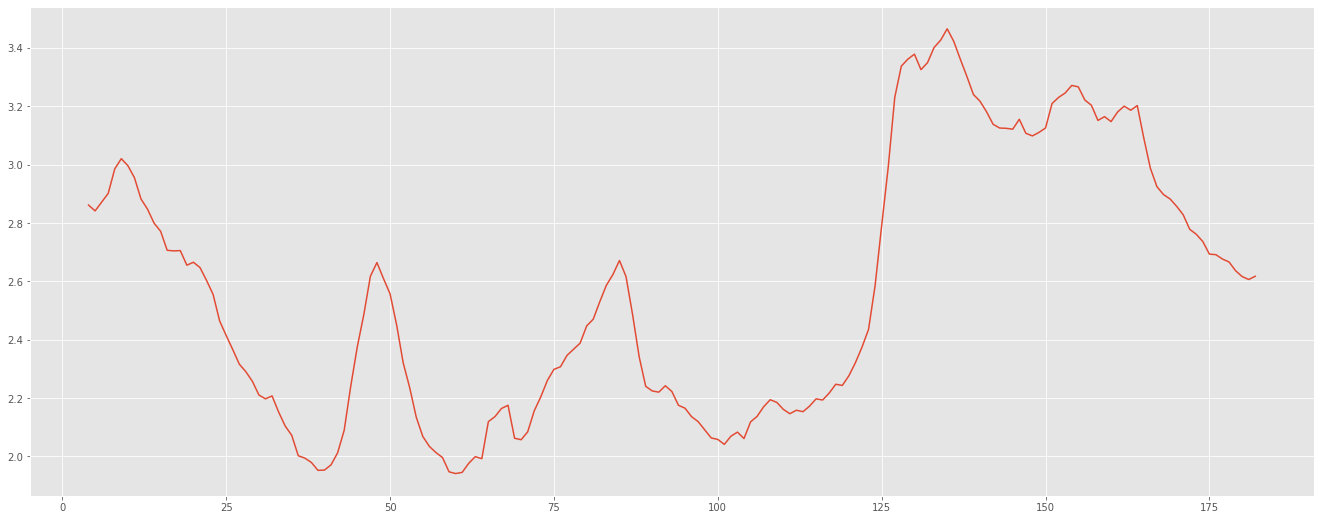

In [8]:
train_seas_diff.plot()

In [9]:
kpss(train_seas_diff, nlags='auto')

(0.7028221064329737,
 0.013288899415184206,
 9,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [10]:
kpss(train_seas_diff.diff().dropna(), nlags='auto')


/home/the_sun/.local/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1885: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.11909928386351495,
 0.1,
 7,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [11]:
cleaned_train = train_seas_diff.diff().dropna()

<AxesSubplot:>

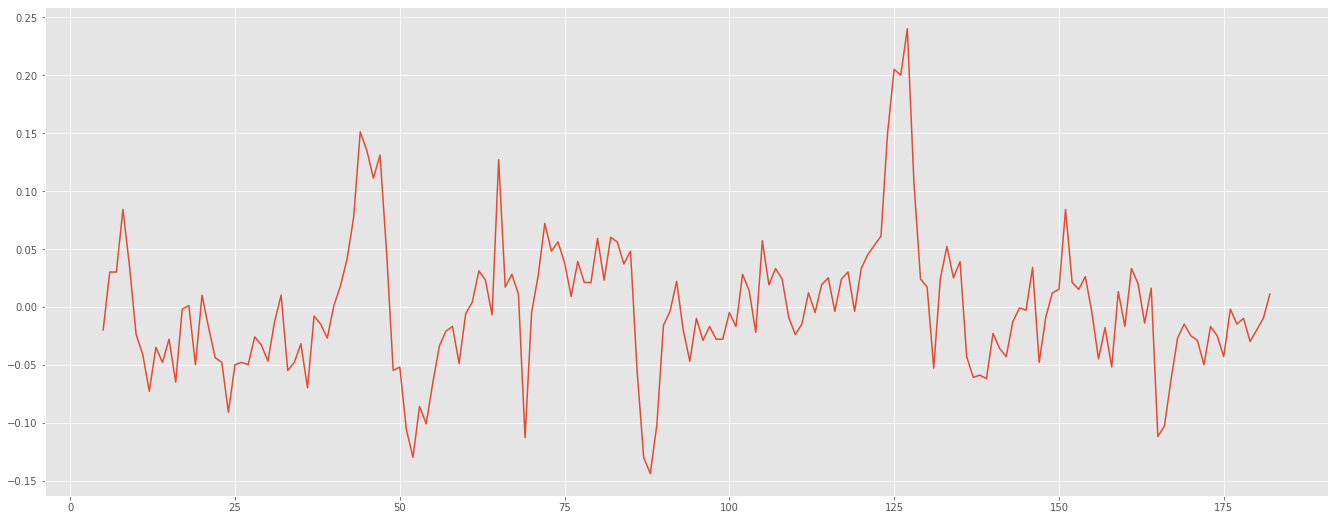

In [12]:
cleaned_train.plot()

(<Figure size 864x576 with 3 Axes>,
 array([<AxesSubplot:ylabel='pop'>,
        <AxesSubplot:title={'center':'Autocorrelation'}>,
        <AxesSubplot:title={'center':'Partial Autocorrelation'}>],
       dtype=object))

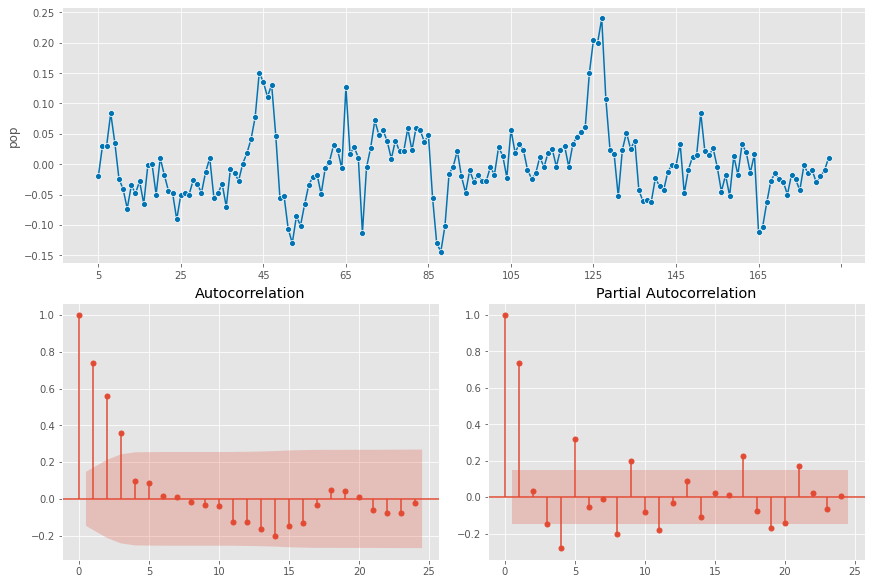

In [13]:
plot_correlations(cleaned_train)

In [14]:
d = 1
max_p = 3
max_q = 3

D = 1
max_P = 3
max_Q = 1
sp = 4


orders = []

for p in range(max_p+1):
    for q in range(max_q+1):
        orders.append((p, d, q))

seasonal_orders = []

for p in range(max_P+1):
    for q in range(max_Q+1):
        seasonal_orders.append((p, D, q, sp))
        




In [15]:



fh = ForecastingHorizon(list(range(1, test_size+1)))

cv = ExpandingWindowSplitter(
    start_with_window=True,
    initial_window=130,
    fh=fh,
    step_length=test_size)

forecaster = ARIMA()
param_grid = {"order" : orders, "seasonal_order":seasonal_orders}
gscv = ForecastingGridSearchCV(
    forecaster=forecaster,
    param_grid=param_grid,
    cv=cv, n_jobs=-1)
gscv.fit(train)

/home/the_sun/.local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/the_sun/.local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/the_sun/.local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/the_sun/.local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/the_sun/.local/lib/python3.8/site-packages/statsmodels/base/model.py:5

/home/the_sun/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/the_sun/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/the_sun/.local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/the_sun/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/the_sun/.

/home/the_sun/.local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/the_sun/.local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/the_sun/.local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/the_sun/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/the_sun/.local/lib/python3.8/site-packages/statsmodels/base/m

/home/the_sun/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/the_sun/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/the_sun/.local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/the_sun/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/the_sun/.

ForecastingGridSearchCV(cv=ExpandingWindowSplitter(fh=ForecastingHorizon([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
            20],
           dtype='int64', is_relative=True),
            initial_window=None, step_length=20),
                        forecaster=ARIMA(), n_jobs=-1,
                        param_grid={'order': [(0, 1, 0), (0, 1, 1), (0, 1, 2),
                                              (0, 1, 3), (1, 1, 0), (1, 1, 1),
                                              (1, 1, 2), (1, 1, 3), (2, 1, 0),
                                              (2, 1, 1), (2, 1, 2), (2, 1, 3),
                                              (3, 1, 0), (3, 1, 1), (3, 1, 2),
                                              (3, 1, 3)],
                                    'seasonal_order': [(0, 1, 0, 4),
                                                       (0, 1, 1, 4),
                                                       (1, 1, 0, 4),
                                

In [16]:
gscv.best_forecaster_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  183
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 4)   Log Likelihood                 350.442
Date:                           Mon, 14 Mar 2022   AIC                           -686.884
Time:                                   12:09:55   BIC                           -664.611
Sample:                                        0   HQIC                          -677.852
                                           - 183                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0001      0.001     -0.156      0.876      -0.002       0.002
ar.L1          0.2175      2.225      0.098      0.922      -4.144       4.579
ar.L2          0.7086      2.134      0.332      0.740      -3.474       4.891
ma.L1          0.7281      2.242      0.325      0.745      -3.665       5.122
ar.S.L4        0.0702      0.108      0.650      0.516      -0.141       0.282
ma.S.L4       -0.8100      0.074    -10.900      0.000      -0.956      -0.664
sigma2         0.0011      0.000     10.973      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   1.76   Jarque-Bera (JB):                25.19
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               1.20   Skew:                             0.41
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Forecast error: 0.0014250812299757515


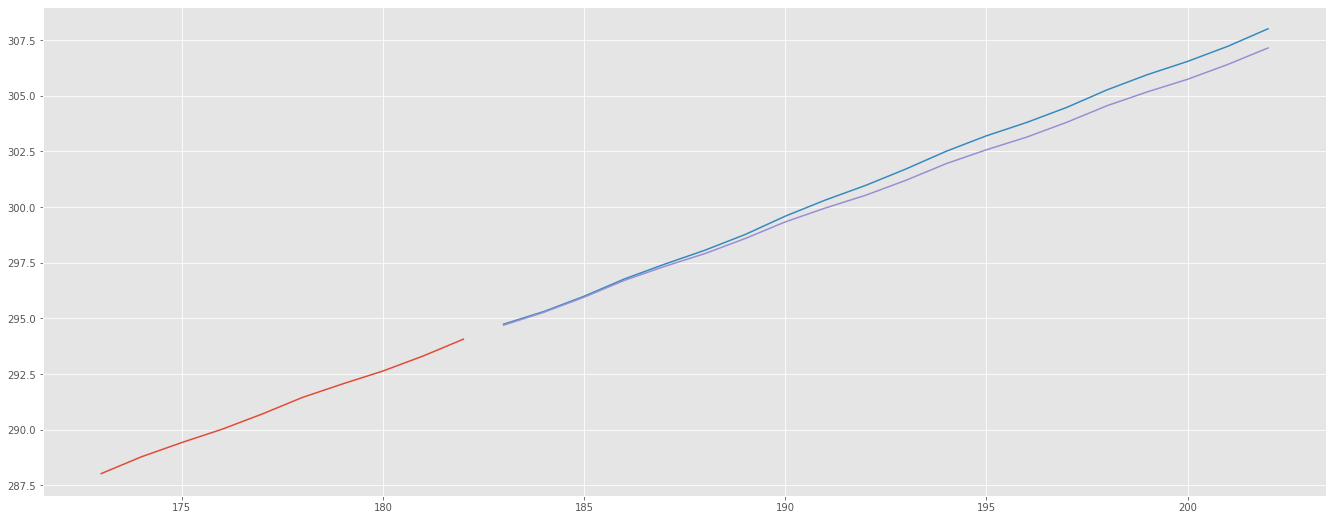

In [17]:
pred = gscv.best_forecaster_.predict(fh)


train.tail(10).plot()
test.plot()
pred.plot()

print(f'Forecast error: {mean_absolute_percentage_error(test, pred)}')

<AxesSubplot:>

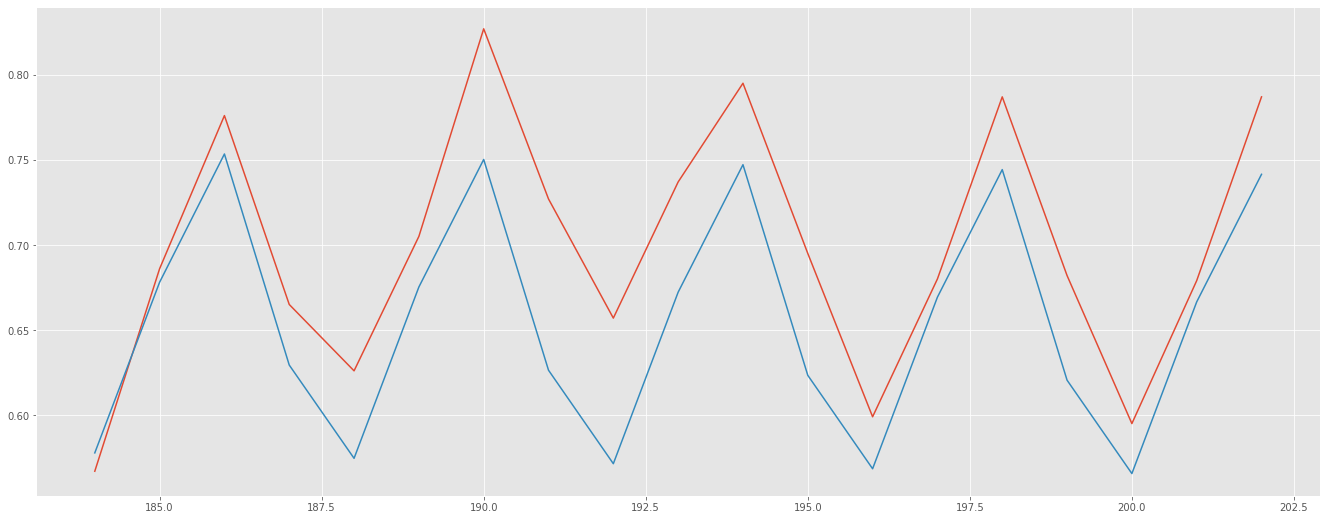

/home/the_sun/.local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/the_sun/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/the_sun/.local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/the_sun/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/the_sun/.local/lib/python3.8/site-packages/statsmode

In [18]:
test.diff().plot()
pred.diff().plot()


In [25]:
forecaster = AutoARIMA(sp=4, suppress_warnings=True)

forecaster.fit(train)


AutoARIMA(sp=4, suppress_warnings=True)

In [26]:
forecaster.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  183
Model:             SARIMAX(2, 2, 2)x(1, 0, [1], 4)   Log Likelihood                 352.555
Date:                             Mon, 14 Mar 2022   AIC                           -691.111
Time:                                     10:19:59   BIC                           -668.721
Sample:                                          0   HQIC                          -682.034
                                             - 183                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6003      0.063      9.455      0.000       0.476       0.725
ar.L2         -0.8904      0.063    -14.203      0.000      -1.013      -0.768
ma.L1         -0.7131      0.038    -18.779      0.000      -0.787      -0.639
ma.L2          0.9677      0.038     25.729      0.000       0.894       1.041
ar.S.L4        0.9903      0.007    132.539      0.000       0.976       1.005
ma.S.L4       -0.7569      0.073    -10.429      0.000      -0.899      -0.615
sigma2         0.0011      0.000      9.406      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                10.56
Prob(Q):                              0.71   Prob(JB):                         0.01
Heteroskedasticity (H):               1.10   Skew:                             0.40
Prob(H) (two-sided):                  0.73   Kurtosis:                         3.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/home/the_sun/.local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/the_sun/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/the_sun/.local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/the_sun/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/the_sun/.local/lib/python3.8/site-packages/statsmode

Forecast error: 0.0018923947172030328


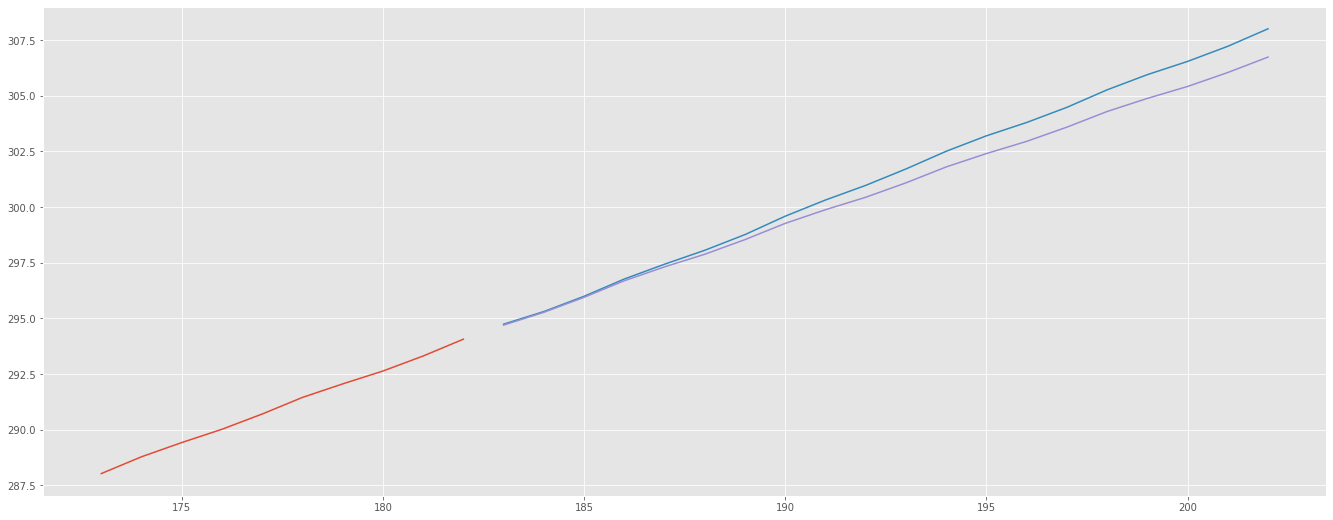

In [34]:
pred = forecaster.predict(fh)


train.tail(10).plot()
test.plot()
pred.plot()

print(f'Forecast error: {mean_absolute_percentage_error(test, pred)}')

<AxesSubplot:>

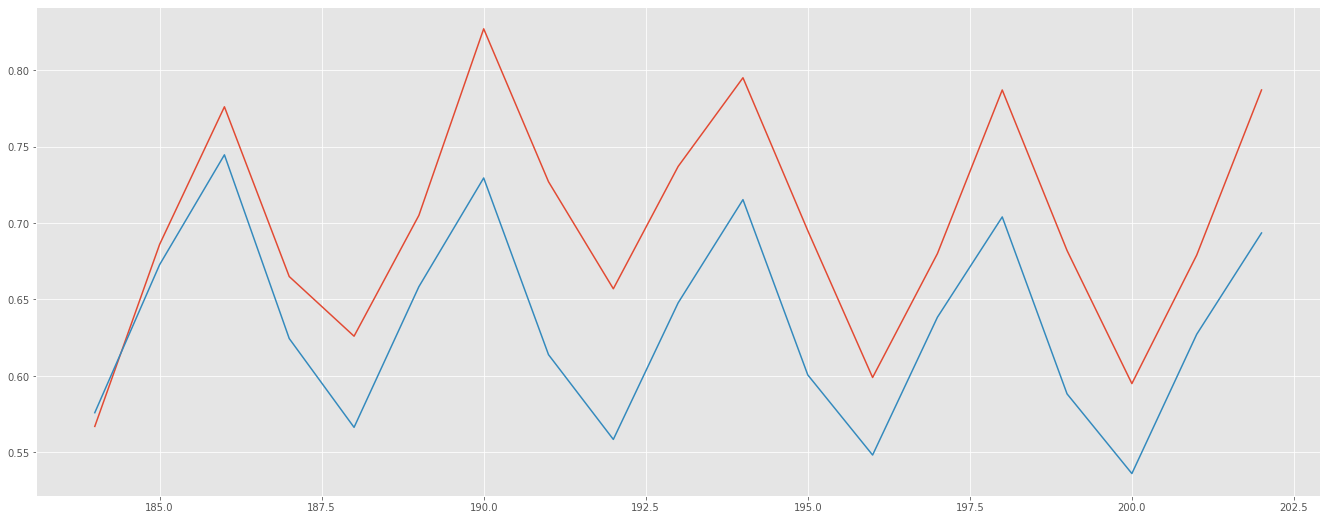

In [35]:
test.diff().plot()
pred.diff().plot()

<AxesSubplot:>

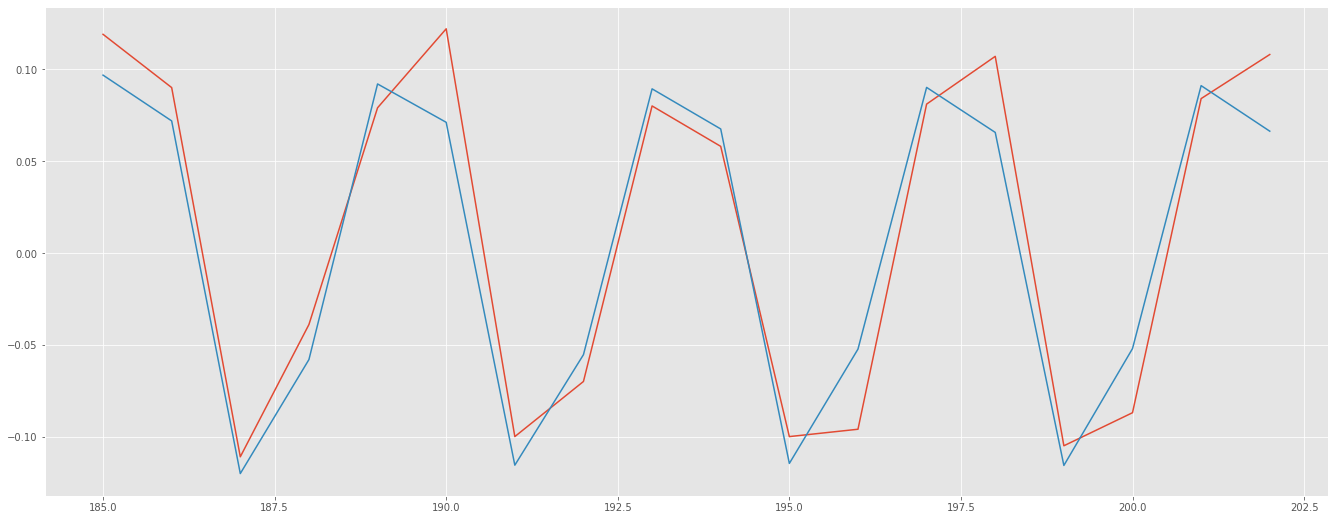

In [37]:
test.diff().diff().plot()
pred.diff().diff().plot()

In [39]:
from statsmodels.tsa.stattools import grangercausalitytests

In [40]:

# Гипотеза о том, что временной ряд из второй колонки НЕ помогает в прогнозировании
# первой колонки не отвергается, что в целом согласуется со здравым смыслом.
newdata = np.random.normal(0, 1, (10000, 2))
_ = grangercausalitytests(newdata, maxlag = [10])


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.3569  , p=0.1938  , df_denom=9969, df_num=10
ssr based chi2 test:   chi2=13.5972 , p=0.1922  , df=10
likelihood ratio test: chi2=13.5880 , p=0.1926  , df=10
parameter F test:         F=1.3569  , p=0.1938  , df_denom=9969, df_num=10


In [41]:
newdata

array([[ 1.83984274,  3.32763354],
       [ 0.54543823,  0.28054889],
       [-1.75754209, -2.21866995],
       ...,
       [ 0.81094052, -1.18330458],
       [-0.60468892,  0.5134889 ],
       [ 0.57097986,  0.16700203]])

In [42]:
import statsmodels.api as sm

data = sm.datasets.macrodata.load_pandas().data

In [45]:
columns = data.loc[:,('realcons','realgdp')]
_= grangercausalitytests(columns, maxlag = [10])


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.5918  , p=0.1125  , df_denom=172, df_num=10
ssr based chi2 test:   chi2=17.8619 , p=0.0573  , df=10
likelihood ratio test: chi2=17.0830 , p=0.0725  , df=10
parameter F test:         F=1.5918  , p=0.1125  , df_denom=172, df_num=10


In [46]:
columns = data.loc[:,('realgdp', 'realcons')]
# columns.loc[:, 'realgdp'] = columns.loc[:, 'realgdp'].diff().diff()

_= grangercausalitytests(columns.dropna(), maxlag = [10])


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=6.8687  , p=0.0000  , df_denom=172, df_num=10
ssr based chi2 test:   chi2=77.0733 , p=0.0000  , df=10
likelihood ratio test: chi2=64.8486 , p=0.0000  , df=10
parameter F test:         F=6.8687  , p=0.0000  , df_denom=172, df_num=10


### ARIMAX

In [47]:
cur_data = data.loc[:,('realgdp', 'realcons')]

cur_data.loc[:, 'realcons'] = cur_data.loc[:, 'realcons'].shift()
cur_data = cur_data.dropna()

test_size = 20

train, test = temporal_train_test_split(cur_data, test_size=test_size)

y_train, X_train = train.realgdp, train.realcons
y_test, X_test = test.realgdp, test.realcons

In [48]:
from sktime.forecasting.ets import AutoETS

/home/the_sun/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


Forecast error: 0.013312010736922031


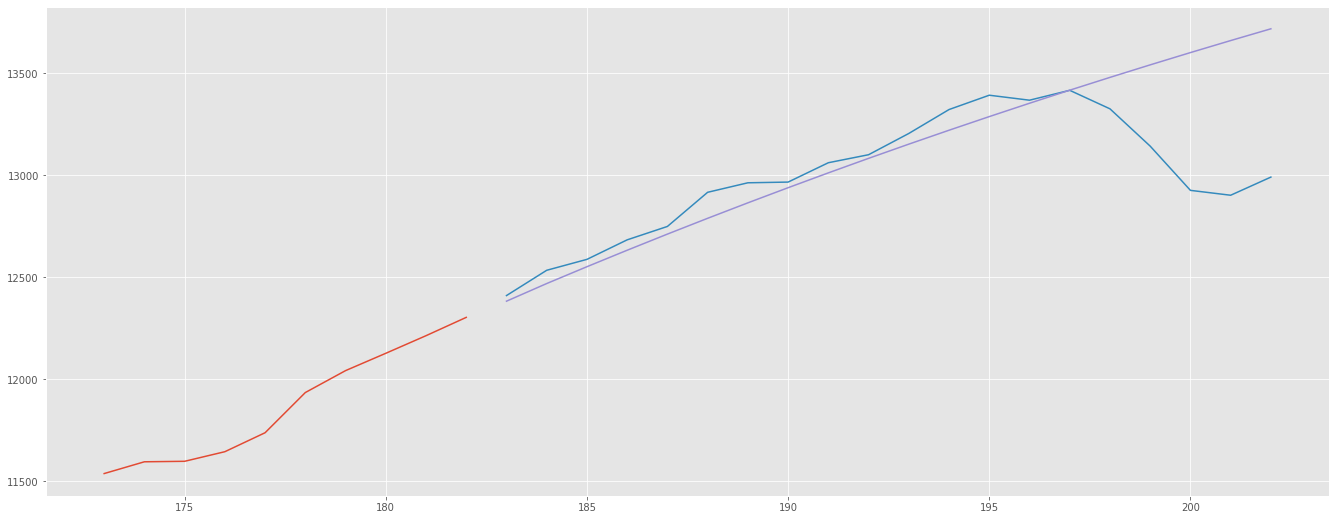

In [49]:
fh = ForecastingHorizon(list(range(1, test_size+1)))


forecaster =  AutoARIMA(suppress_warnings=True)
forecaster.fit(y_train, X_train)


forecaster_X = AutoETS(trend="add", damped_trend=True)
forecaster_X.fit(X_train)

X_pred = forecaster_X.predict(fh)
pred = forecaster.predict(fh, X_pred)

y_train.tail(10).plot()
y_test.plot()
pred.plot()

print(f'Forecast error: {mean_absolute_percentage_error(y_test, pred)}')

In [50]:
forecaster.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  182
Model:               SARIMAX(1, 0, 2)   Log Likelihood                -953.161
Date:                Mon, 14 Mar 2022   AIC                           1918.321
Time:                        10:42:36   BIC                           1937.545
Sample:                             0   HQIC                          1926.115
                                - 182                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     22.0891     14.567      1.516      0.129      -6.462      50.640
realcons       1.3996      0.026     53.885      0.000       1.349       1.450
ar.L1          0.9569      0.029     33.191      0.000       0.900       1.013
ma.L1         -0.2966      0.071     -4.189      0.000      -0.435      -0.158
ma.L2          0.1491      0.074      2.020      0.043       0.004       0.294
sigma2      1967.7057    179.101     10.987      0.000    1616.675    2318.737
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 4.65
Prob(Q):                              0.76   Prob(JB):                         0.10
Heteroskedasticity (H):               2.05   Skew:                             0.25
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Forecast error: 0.015247276354998424


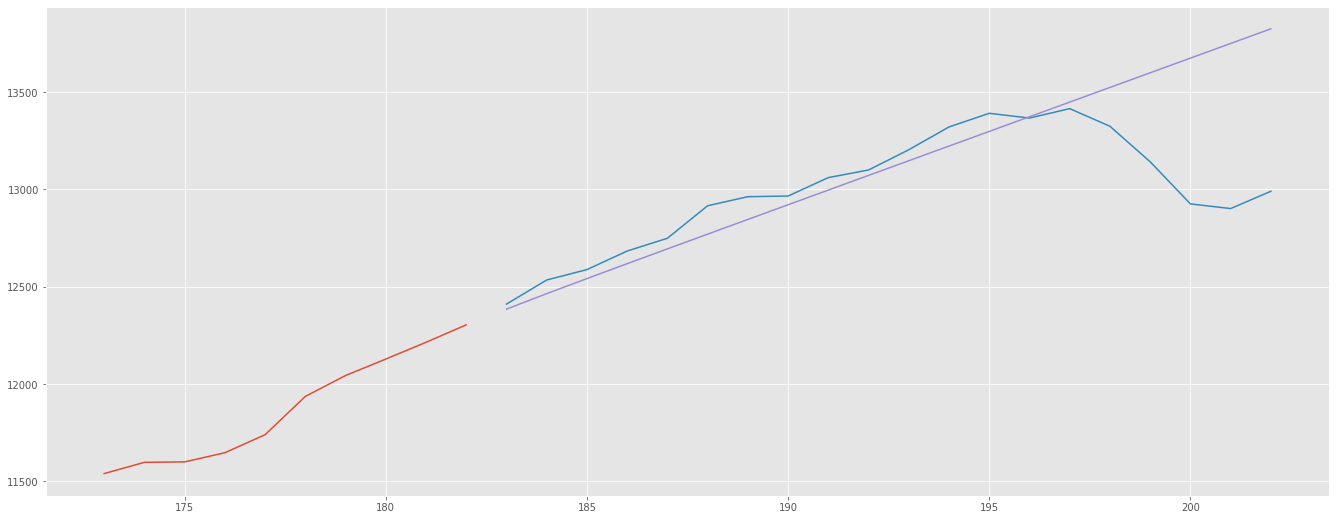

In [51]:
fh = ForecastingHorizon(list(range(1, test_size+1)))


forecaster =  AutoARIMA(suppress_warnings=True)
forecaster.fit(y_train)


pred = forecaster.predict(fh)

y_train.tail(10).plot()
y_test.plot()
pred.plot()

print(f'Forecast error: {mean_absolute_percentage_error(y_test, pred)}')

In [52]:
forecaster.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  182
Model:               SARIMAX(2, 2, 1)   Log Likelihood                -958.136
Date:                Mon, 14 Mar 2022   AIC                           1924.271
Time:                        10:43:02   BIC                           1937.043
Sample:                             0   HQIC                          1929.450
                                - 182                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2178      0.075      2.918      0.004       0.072       0.364
ar.L2          0.2110      0.063      3.357      0.001       0.088       0.334
ma.L1         -0.9697      0.021    -46.444      0.000      -1.011      -0.929
sigma2      2435.5697    202.860     12.006      0.000    2037.972    2833.168
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                12.17
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.96   Skew:                             0.06
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""